In [1]:
import sympy as sp
import minterpy as mp
import numpy as np
'''from minterpy.pointcloud_utils import *
''''''
from mpl_toolkits import mplot3d
%matplotlib inline
'''
import torch
import torchvision
from torchvision import transforms, datasets

import random
import numpy as np
import matplotlib.pyplot as plt

'''import os
''''''from operator import itemgetter
'''
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import ot
'''
from sklearn.neighbors import NearestNeighbors

import ripser
import persim
from persim import plot_diagrams'''

'''from operator import itemgetter
'''

#do pip installs as follows to use vedo for plotting point clouds
#pip install vedo
#pip install ipyvtklink

import numpy as np


In [2]:
def getFashionMNIST(batch_size = 120):
    fashionmnist_data = torchvision.datasets.FashionMNIST(download=True, root = 'data/fashionmnist', transform = 
                                                                                 transforms.Compose([transforms.Resize(32),
                                                                                 transforms.ToTensor(), 
                                                                                 transforms.Lambda(lambda x: x.repeat(1, 1, 1))
                                                                                 ]))
    train_loader = torch.utils.data.DataLoader(fashionmnist_data,
                                              batch_size=batch_size,
                                              shuffle=False,
                                              num_workers=16)
    return train_loader, train_loader



def getDataset(dataset = "MNIST", batch_size = 120):
    if(dataset == "MNIST"):
        train_loader, test_loader = getMNIST(batch_size)
        noChannels,dx, dy = train_loader.dataset.__getitem__(1)[0].shape
    elif(dataset == "FashionMNIST"):
        train_loader, test_loader = getFashionMNIST(batch_size)
        noChannels, dx, dy = train_loader.dataset.__getitem__(1)[0].shape
    elif(dataset == "Cifar10"):
        train_loader, test_loader = getCifar10(batch_size)
        noChannels, dx, dy = train_loader.dataset.__getitem__(1)[0].shape
        """
    elif(dataset == "cityscapes"):
        train_loader, test_loader = getcityscapes(batch_size)
        noChannels, dx, dy = train_loader.dataset.__getitem__(1)[0].shape
        """
    else:
        return None, None, None, None, None    
        
    return train_loader, test_loader, noChannels, dx, dy

In [3]:
train_loader, test_loader, noChannels, dx, dy = getDataset("FashionMNIST")  # FashionMNIST , MNIST

/home/chethan/.local/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
for inum, (batch_x, label) in enumerate(train_loader):
    break
    

In [5]:
image1 = batch_x[0][0]

image2 = batch_x[5][0]

/tmp/ipykernel_112934/2542893104.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(image1).view(32,32))


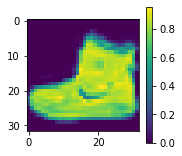

In [6]:
plt.figure(figsize=(2.5, 2.5))
plt.imshow(torch.tensor(image1).view(32,32))
plt.colorbar()
plt.show()

/tmp/ipykernel_112934/34225485.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(image2).view(32,32))


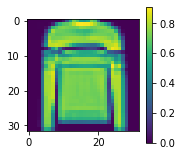

In [7]:
plt.figure(figsize=(2.5, 2.5))
plt.imshow(torch.tensor(image2).view(32,32))
plt.colorbar()
plt.show()

# Wasserstein distance by sinkhorn

In [8]:
def indices_array(n):
    r = np.arange(n)
    out = np.empty((n,n,2),dtype=int)
    out[:,:,0] = r[:,None]
    out[:,:,1] = r
    return out

In [9]:
imageIndices = indices_array(batch_x.shape[3]).reshape(32*32,2)
imageIndices.shape

(1024, 2)

In [10]:
Mm = [[np.sum((imageIndices[i] - imageIndices[j])**2) for i in range(len(imageIndices))] for j in range(len(imageIndices)) ]

Mm = torch.tensor(Mm).type(torch.FloatTensor)

In [63]:


gs = ((image1 + 10**(-10)).reshape(1024,1)) / torch.sum((image1))
h = ((image2 + 10**(-10)).reshape(1024,1)) / torch.sum((image2))

# 10**(-10) added to avoid 0 / 0 sitiation 

wassDistance = ot.sinkhorn2(h, gs, Mm, 0.04)

#0.09 is the regularization parameter. You can play around with it 

In [64]:
wassDistance

tensor([0.1575])

In [33]:
#ot.bregman.sinkhorn_log(h, gs, Mm, 0.09)

# Sliced Wasserstein distance between Images

In [38]:
wassDistance_sliced = ot.sliced_wasserstein_distance(image1, image2, seed=0,)  


In [39]:
wassDistance_sliced

tensor(0.3561)

In [16]:
# Sliced wasserstein distance seems is faster and efficient 